In [1]:
#load the data
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#loading the data with https://www.python-course.eu/neural_network_mnist.php

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#get class names from https://www.tensorflow.org/tutorials/keras/classification
clothing_labels= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [3]:
#check out shape of testing and training set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
import collections
collections.Counter(y_test)
collections.Counter(y_train)

#equal distribution amongst all classes 

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

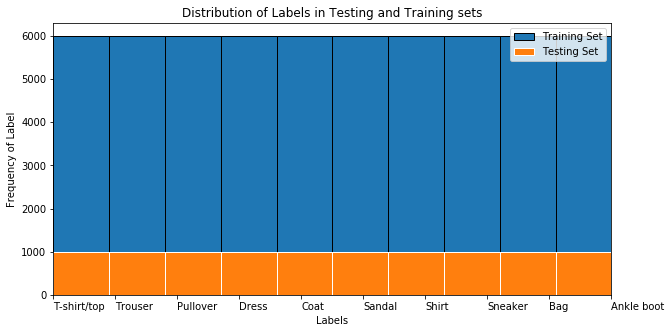

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(y_train, label="Training Set", edgecolor="black")
plt.hist(y_test, label="Testing Set", edgecolor="white")
ax.set_xticklabels(clothing_labels)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('left')

plt.xlim(0,9)
plt.legend()
plt.title("Distribution of Labels in Testing and Training sets")
plt.xlabel("Labels")
plt.ylabel("Frequency of Label")
plt.show()

In [0]:
#plot some of the clothing items randomly
import random
#get 10 random indexes in y test 
#each time you run this, you'll get new numbers; easy way to keep sampling/visualize our training and testing set examples
rand_ytest = [random.randint(0, len(y_test)) for i in range(10)]

#get 10 random indexes in y train
rand_ytrain = [random.randint(0, len(y_train)) for i in range(10)]

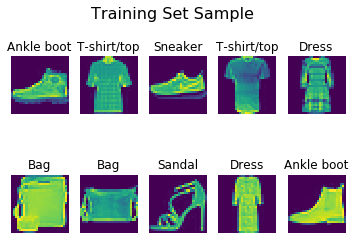

In [6]:
#plot some of the training data 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Training Set Sample', fontsize=16)
for i, j in zip((rand_ytrain), axs.flat):
  j.imshow(x_train[i])
  j.set_title(clothing_labels[y_train[i]])
  #dont show axis 
  j.axis('off')
  


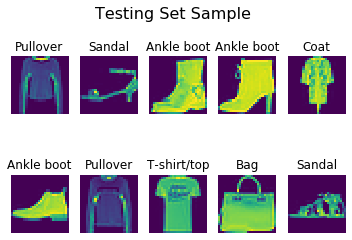

In [7]:
#plot some of the testing data 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Testing Set Sample', fontsize=16)
for i, j in zip((rand_ytest), axs.flat):
  j.imshow(x_test[i])
  j.set_title(clothing_labels[y_test[i]])
  #dont show axis 
  j.axis('off')

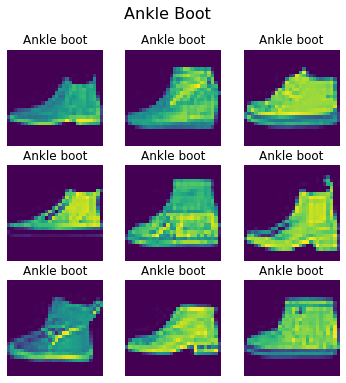

In [171]:
test_0 = np.where(y_test==9)

#plot some of each class 
fig, axs = plt.subplots(3,3,figsize=(6,6) )
fig.suptitle('Ankle Boot', fontsize=16)
for i, j in zip((test_0[0]), axs.flat):
  j.imshow(x_test[test_0][i])
  j.set_title(clothing_labels[y_test[i]])
  #dont show axis 
  j.axis('off')

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #increase unit # 
    #the higher this unit number, the longer it takes to run
    #the amount of accuracy is not significantly increased 
    keras.layers.Dense(256, activation='relu'),
    #add one more dense layer
    #lower than previous layer, does not affect accuracy on training set much but affects testing metrics 
    keras.layers.Dense(256, activation='relu'),
    #10 for 10 different clothing types 
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#compare with the normalized model; divide the images by 255 
x_test_n = x_test/255
x_train_n = x_train/255

In [255]:
import time
start_time = time.time()
model.fit(x_train_n, y_train, epochs=35)
print("--- %s seconds ---" % (time.time() - start_time))
#normalized model is much more accurate 
#increase the number of epochs 

Train on 60000 samples
Epoch 1/35
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0527 - acc: 0.9816
Epoch 2/35
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0553 - acc: 0.9803
Epoch 3/35
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0511 - acc: 0.9819
Epoch 4/35
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0518 - acc: 0.9820
Epoch 5/35
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0525 - acc: 0.9814
Epoch 6/35
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0498 - acc: 0.9821
Epoch 7/35
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0529 - acc: 0.9821
Epoch 8/35
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0500 - acc: 0.9825
Epoch 9/35
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0484 - acc: 0.9826
Epoch 10/35
60000/60000 [=========================

In [194]:
test_loss, test_acc = model.evaluate(x_test_n,  y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 - 0s - loss: 1.0588 - acc: 0.8879
Test loss: 1.0587928296029394
Test accuracy: 0.8879


In [195]:
#https://www.tensorflow.org/tutorials/keras/classification
model_pred = keras.Sequential([model, keras.layers.Softmax()])
pred = model_pred.predict(x_test)
pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Ankle boot')

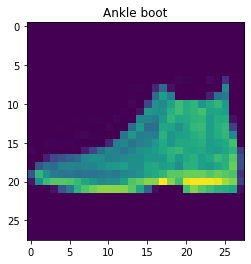

In [15]:
#get index of max value 
np.argmax(pred[0])
#the prediction for the first image is 9 
clothing_labels[9]
#The clothing label for index 9 is "Ankle boot"
#let's look at the first image
plt.imshow(x_test[0])
plt.title(clothing_labels[np.argmax(pred[0])])

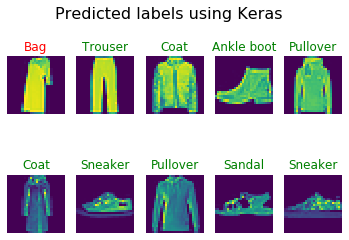

In [210]:
#check out a random sample of 10 
rand_pred = [random.randint(0, len(pred)) for i in range(10)]

rand_pred
#plot the randomized predictions 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Predicted labels using Keras', fontsize=16)
for i, j in zip((rand_pred), axs.flat):
  j.imshow(x_test[i])
  j.set_title(clothing_labels[np.argmax(pred[i])], color = ('red' if np.argmax(pred[i])!=y_test[i] else 'green'))
  #dont show axis 
  j.axis('off')


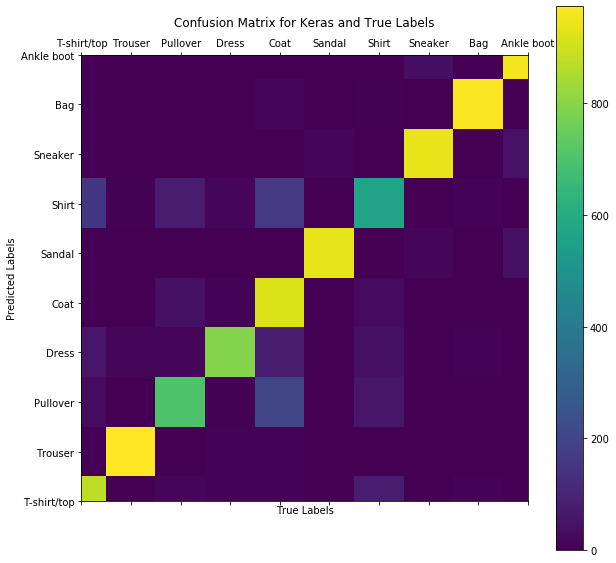

In [211]:
from sklearn.metrics import confusion_matrix

pred_keras = []
for i in (range(0, len(pred))):
  pred_keras.append(np.argmax(pred[i]))

cm = confusion_matrix(y_test, pred_keras)
#fig, ax = plt.subplots(figsize=(10, 5))

fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111) 
ax.matshow(cm)
fig.colorbar(ax.matshow(cm))
ax.set_xticklabels(clothing_labels)
plt.xlim(0,9)
plt.ylim(0,9)
plt.title("Confusion Matrix for Keras and True Labels")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
ax.set_yticklabels(clothing_labels) 
plt.show()

In [238]:
#try another model for classification
#Create a MnB model 
from sklearn.naive_bayes import MultinomialNB
# Train the model using the training sets
mnb_model = MultinomialNB()
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec
#mnb requires data be in 2D, our data is 3D
nsamples, nx, ny = x_train_n.shape
x_train_d2 = x_train_n.reshape((nsamples,nx*ny))

nsamples_test, nx_test, ny_test = x_test_n.shape
x_test_d2 =  x_test_n.reshape((nsamples_test,nx_test*ny_test))

In [240]:
#train the model 
#get processesing time
#https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
import time
start_time = time.time()
mnb_model.fit(x_train_d2, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.24191641807556152 seconds ---


In [241]:
#get predictions

mnb_pred = mnb_model.predict(x_test_d2)
mnb_pred

array([9, 2, 1, ..., 3, 1, 7], dtype=uint8)

In [242]:
#get accuracy metrics 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mnb_pred)

0.6552

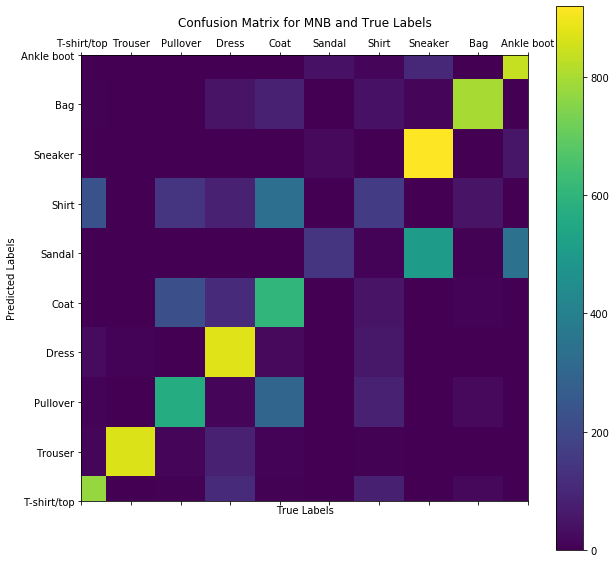

In [243]:
cm_mnb = confusion_matrix(y_test, mnb_pred)
#fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111) 
ax.matshow(cm_mnb)
fig.colorbar(ax.matshow(cm_mnb))
ax.set_xticklabels(clothing_labels)
plt.xlim(0,9)
plt.ylim(0,9)
plt.title("Confusion Matrix for MNB and True Labels")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
ax.set_yticklabels(clothing_labels) 
plt.show()

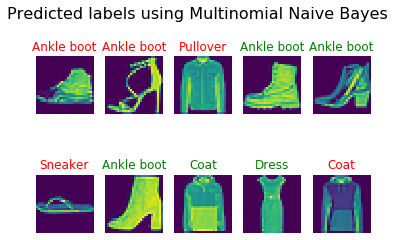

In [245]:
#plot the predictions + test data 
#check out a random sample of 10 
rand_pred_mnb = [random.randint(0, len(mnb_pred)) for i in range(10)]
#plot the randomized predictions 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Predicted labels using Multinomial Naive Bayes', fontsize=16)
for i, j in zip((rand_pred_mnb), axs.flat):
  j.imshow(x_test[i])
  j.set_title(clothing_labels[(mnb_pred[i])],color=('red' if mnb_pred[i]!=y_test[i] else 'green'))
  #dont show axis 
  j.axis('off')

In [251]:
#one more image classification 
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
# Create Decision Tree classifer object
#criterion w/ default, splitter best => accuracy = .7902
#criterion entropy and splitter best = .793
#criterion entropy, splitter random = .7959 
#higher max depth prevents overfitting, lower prevents underfitting 
#add max depth 3; accuracy is .50
#max depth 10, accuracy is .8036
#max depth 13 is .8108 but there may be overfitting, removing max depth and reverting to default parameter 
model_dt = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=13)

#model requires data to be 2d, used the transformed train/testing sets from the previous model 
# Train Decision Tree Classifer
start_time = time.time()
model_dt = model_dt.fit(x_train_d2,y_train)
print("--- %s seconds ---" % (time.time() - start_time))
#get predictions
pred_dt = model_dt.predict(x_test_d2)

# print accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, pred_dt))


--- 6.009583473205566 seconds ---
Accuracy: 0.8071


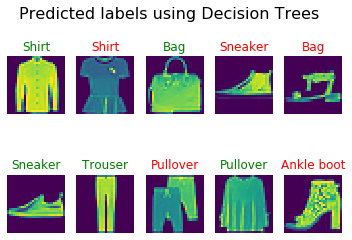

In [253]:
#plot some predictions 
#check out a random sample of 10 
rand_pred_dt = [random.randint(0, len(pred_dt)) for i in range(10)]
#plot the randomized predictions 
fig, axs = plt.subplots(2, 5)
fig.suptitle('Predicted labels using Decision Trees', fontsize=16)
for i, j in zip((rand_pred_dt), axs.flat):
  j.imshow(x_test[i])
  j.set_title(clothing_labels[(pred_dt[i])],color=('red' if pred_dt[i]!=y_test[i] else 'green'))
  #dont show axis 
  j.axis('off')

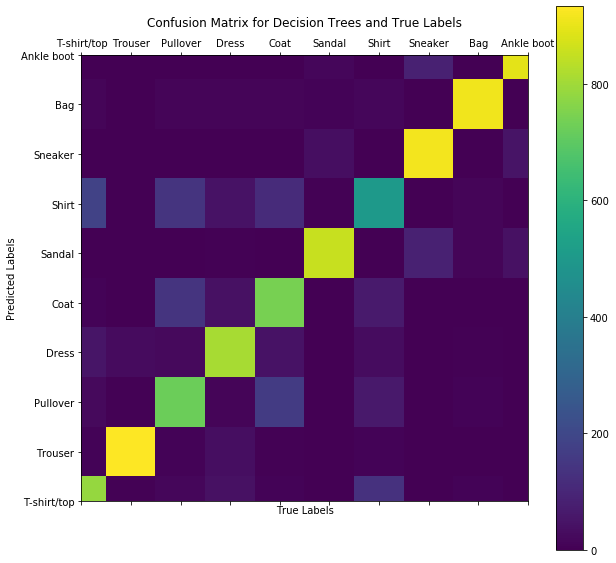

In [254]:
cm_dt = confusion_matrix(y_test, pred_dt)
#fig, ax = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111) 
ax.matshow(cm_dt)
fig.colorbar(ax.matshow(cm_dt))
ax.set_xticklabels(clothing_labels)
plt.xlim(0,9)
plt.ylim(0,9)
plt.title("Confusion Matrix for Decision Trees and True Labels")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
ax.set_yticklabels(clothing_labels) 
plt.show()